## Task 3: Improve Melbourne Home Sales Price, Bring Down MAPE to less than 15%

# Initialize

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error as MAPE

# Load Data

In [5]:
# Here we use the dropna method to get rid of entries with no data (NaN)
dfMlb = pd.read_csv('house_prices.csv').dropna()

# Select Data

In [6]:
# Select a prediction Target
y = dfMlb.loc[:, ['Price']]
y.head()

,Price
1,1035000
2,1465000
4,1600000
6,1876000
7,1636000


In [147]:
# I added as many columns as possible to make the model more accurate
# I didn't include columns with categorical data
x = dfMlb.loc[:, ['BuildingArea', 'YearBuilt','Car','Distance','Rooms','Propertycount', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Bedroom2', 'Postcode']]
x.head()

,BuildingArea,YearBuilt,Car,Distance,Rooms,Propertycount,Bathroom,Landsize,Lattitude,Longtitude,Bedroom2,Postcode
1,79.0,1900.0,0.0,2.5,2,4019,1,156,-37.8079,144.9934,2,3067
2,150.0,1900.0,0.0,2.5,3,4019,2,134,-37.8093,144.9944,3,3067
4,142.0,2014.0,2.0,2.5,4,4019,1,120,-37.8072,144.9941,3,3067
6,210.0,1910.0,0.0,2.5,3,4019,2,245,-37.8024,144.9993,4,3067
7,107.0,1890.0,2.0,2.5,2,4019,1,256,-37.8060,144.9954,2,3067


# Build a Model

In [148]:
# Here we go with the convention of 80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Build Random Forest Model

In [3]:
errors = np.array([])
depths = []
mins = [.7, 2]
# Build Random Forest Models for Different Depths to get Smallest Mean Percent Error
for depth in range(2, 350, 10):
    
    # Use random forest to make the model
    model = RandomForestRegressor(random_state = 1, max_depth = depth)
    
    # Y-train must be convereted to array of right shape
    model.fit(x_train, y_train.values.ravel())
    
    # Predict y-values - Price
    y_pred = model.predict(x_test)

    # Get Mean Percent Error
    error = MAPE(y_test, y_pred)
    
    # Error is appended to error list
    errors = np.append(errors, error)
    
    # Depth is appended to depth list
    depths.append(depth)
    
    # If min error, replace mins array with new error and depth
    if error < mins[0]:
        mins[0], mins[1] = error, depth

NameError: name 'x_train' is not defined

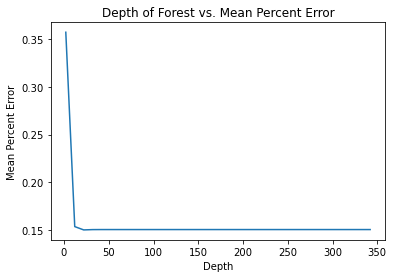

Smallest mean percent error is: 0.1499451649748996 
Depth used: 22


In [151]:
plt.figure()
plt.title('Depth of Forest vs. Mean Percent Error')
plt.xlabel('Depth')
plt.ylabel('Mean Percent Error')
plt.plot(depths, errors)
plt.show()

print('Smallest mean percent error is:', mins[0], '\nDepth used:', mins[1])